
# Project: No-Show Appointments Data Analysis.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction
This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment.A number of
characteristics of the patient are
included in each row.

● Scheduled Day’ tells us on
what day the patient set up their
appointment.

● Neighborhood’ indicates the
location of the hospital.

● Scholarship’ indicates
whether or not the patient is
enrolled in Brazilian welfare
program Bolsa Família.

● The encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.


In [1]:
# Set up import statements for all of the packages that we
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, we will load the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [2]:
# Loading data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Exploring the dimensionality of the DataFrame.
df.shape

(110527, 14)

In [4]:
# Detecting duplicate values.
df.duplicated().sum()

0

There is no duplication of data.

In [5]:
# Detecting missing values.
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There is no missing data.

In [6]:
# Exploring information about a DataFrame including the index dtype and 
#   columns, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
# Exploring descriptive statistics include those that summarize the central tendency, dispersion
# and shape of a dataset’s distribution, excluding NaN values.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


- The mean of age is 37 years.
- Maximum age is 115 years.
- There is an entry error in the patient's age data because the minimum age can't be (-1).

In [8]:
# Exploring errors in entry in the patient's age data because the minimum age can't be (-1).
entry_error_df=df.query('Age== -1')
entry_error_df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


### Data Cleaning 

In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'], axis=1,inplace =True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
# Replace dashes with underscores and lowercase labels for the dataset.
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)
df.head(3)

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [11]:
# Renaming names for incorrectly spelled columns.
df.rename(columns={'hipertension':'hypertension', 'handcap':'handicap'},inplace=True)
df.head(3)

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [12]:
# Remove errors in entry in the patient's age data because the minimum age can't be (-1).
df.drop(index=99832, inplace=True)


In [13]:
df.shape

(110526, 10)

In [14]:
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [15]:
df.dtypes

gender           object
age               int64
neighbourhood    object
scholarship       int64
hypertension      int64
diabetes          int64
alcoholism        int64
handicap          int64
sms_received      int64
no_show          object
dtype: object

## Exploratory Data Analysis
We've trimmed and cleaned the data, now we're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section. 

### General overview

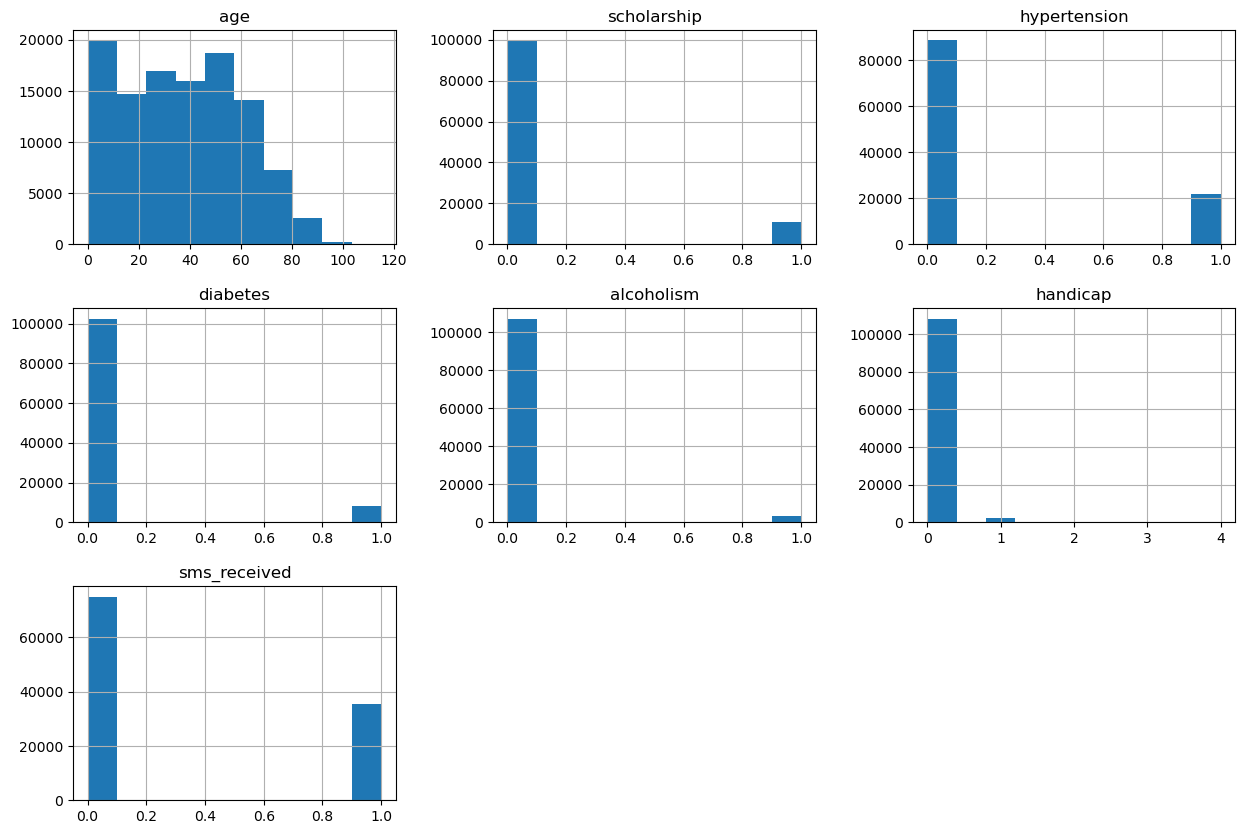

In [16]:
# Exploratory the distribution of the variables in the dataset.
df.hist(figsize=(15,10));

- The majority of patients didn't suffer from diabetes. 
- The vast majority of patients are alcohol-free. 
- The vast majority of patients are on disability-free.
- About 18% (20,000 out Of 110,526) suffered from hypertension. 
- The Number Of patients who received an SMS is half of those who did not. 
- About 10% are enrolled in the Brazilian welfare program.

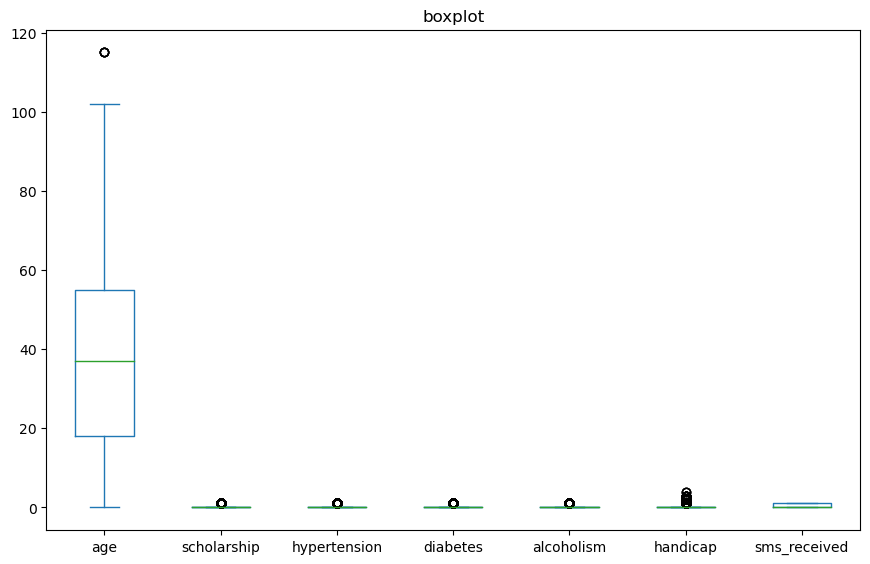

In [17]:
# Exploratory the distribution of data based on a five-number summary to detect outliers and what their values are.
df.plot(kind='box',title='boxplot',figsize=(10.5,6.5));

The age variable has outliers.

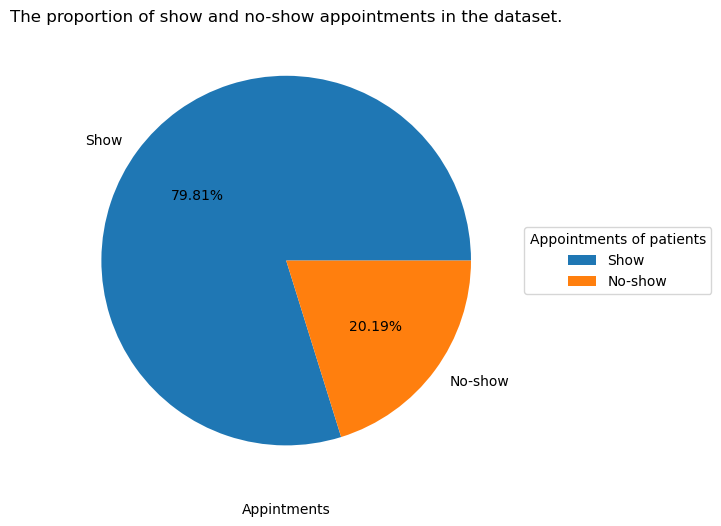

In [18]:
# Exploratory the proportion of show and no-show appointments in the dataset.
mylabels = ["Show", "No-show"]
df.groupby('no_show').size().plot(kind='pie',labels = mylabels,figsize=(6.5,6),autopct='%1.2f%%');
plt.title('The proportion of show and no-show appointments in the dataset.');
plt.legend(title="Appointments of patients", loc="center left",bbox_to_anchor=(1, 0, 0.5, 1));
plt.xlabel('Appintments');
plt.ylabel('');

- The percentage of show appointments is 79.81%, representing 88,207 out of 110,526 appointments (total dataset size).
- The percentage of no-show appointments is 20.19%, representing 22,319 out of 110,526 appointments (total dataset size).

### Main question : what factors are important for us to know in order to predict if a patient will show up for their  scheduled appointment?

In [19]:
show = df.no_show == "No"
noshow = df.no_show == "Yes"

In [20]:
df[show].shape,df[noshow].shape,df.shape

((88207, 10), (22319, 10), (110526, 10))

In [21]:
df[show].shape[0] + df[noshow].shape[0] == df.shape[0]

True

### Question 1: Is the age variable important for us to know to predict if a patient will show up for their  scheduled appointment?

In [22]:
df[show].age.mean(),df[noshow].age.mean()

(37.790504154999034, 34.31766656212196)

- The mean age of patients for show appointments is 38 years.
- The mean age of patients for no-show appointments is 34 years.

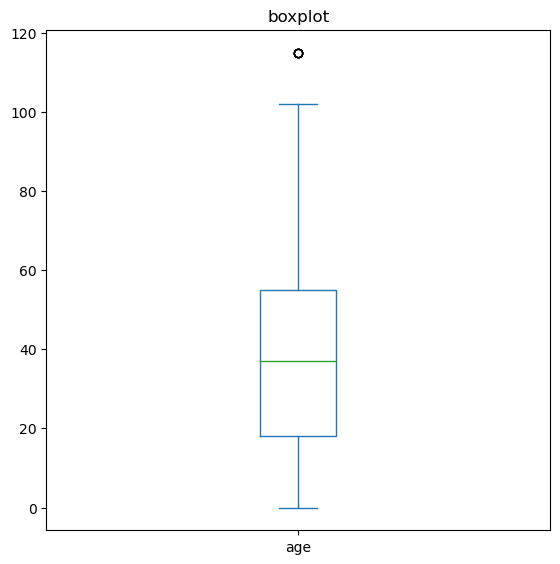

In [23]:
# Exploratory the distribution of age variable based on a five-number summary to detect outliers and what their values are.
df.age.plot(kind='box',title='boxplot',figsize=(6.5,6.5));

In [24]:
out_age_df=df.query('age> 102')
out_age_df

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
63912,F,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,F,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,F,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,F,115,ANDORINHAS,0,0,0,0,1,0,No
97666,F,115,SÃO JOSÉ,0,1,0,0,0,1,No


- Five patients in the dataset have an outlier age which is 115 years.

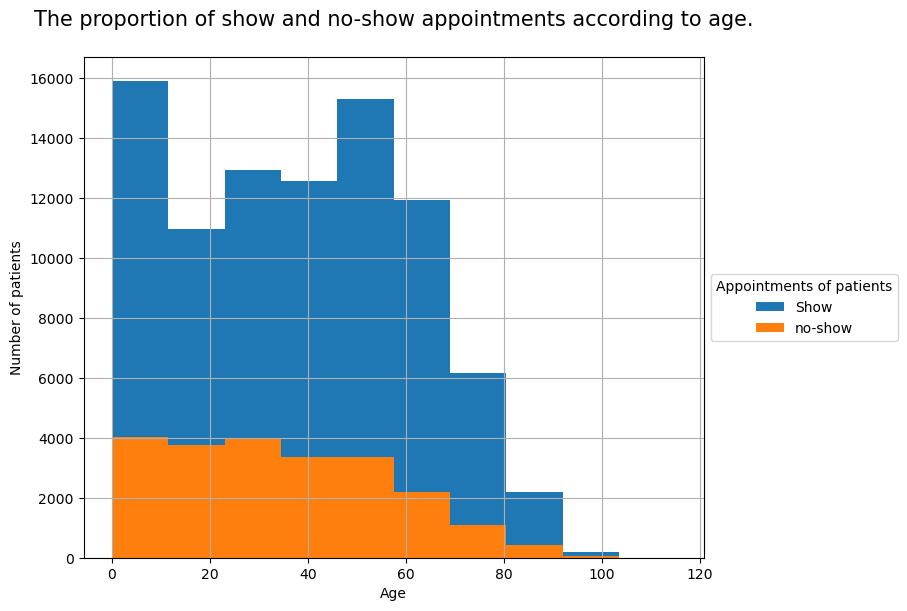

In [25]:
# Exploratory the proportion of patients in the dataset according to age.
# Exploratory the proportion of show and no-show appointments according to age..
def showing(df,col_name):
    plt.figure(figsize =(8,6.5))
    df[col_name][show].hist(label="Show")
    df[col_name][noshow].hist(label="no-show")
    plt.legend(title="Appointments of patients",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1));
    plt.title('The proportion of show and no-show appointments according to age.\n',fontsize =(15));
    plt.xlabel('Age')
    plt.ylabel('Number of patients');
showing(df,'age')

- Patients aged 0-11 years and 47-58 years are shown more than other age groups.
- There is a significant impact of the age variable on the no-show variable.

### Question 2: Is the gender variable important for us to know to predict if a patient will show up for their  scheduled appointment?

In [26]:
# Exploratory the proportion of patients in the dataset according to gender.
# Exploratory the proportion of show and no-show appointments according to gender.
print(df.shape[0])
print(df.gender.value_counts())
print(df[show].shape[0])
print(df[show].gender.value_counts())
print(df[noshow].shape[0])
print(df[noshow].gender.value_counts())

110526
F    71839
M    38687
Name: gender, dtype: int64
88207
F    57245
M    30962
Name: gender, dtype: int64
22319
F    14594
M     7725
Name: gender, dtype: int64


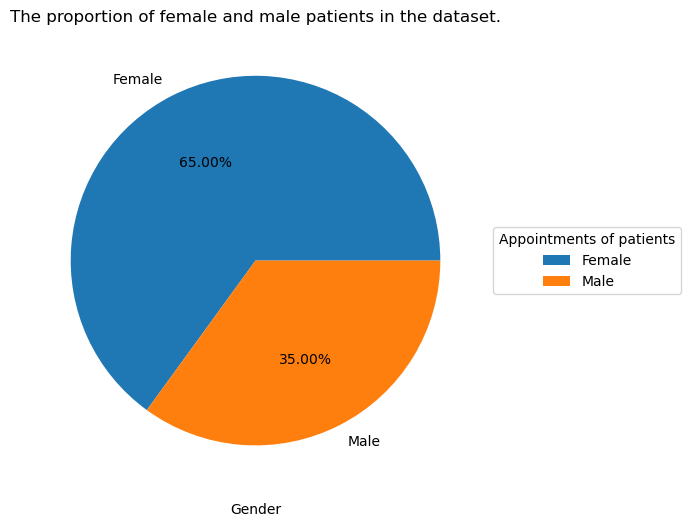

In [27]:
# Exploratory the proportion of patients in the dataset according to gender.
mylabels = ["Female", "Male"]
df.groupby('gender').size().plot(kind='pie',labels = mylabels,figsize=(6.5,6),autopct='%1.2f%%');
plt.title('The proportion of female and male patients in the dataset.');
plt.legend(title="Appointments of patients", loc="center left",bbox_to_anchor=(1, 0, 0.5, 1));
plt.xlabel('Gender');
plt.ylabel('');

- The percentage of female patients is 65 %, representing 71,839 out of 110,526 appointments (total dataset size).
- The percentage of male patients is 35%, representing 38,687 out of 110,526 appointments (total dataset size).

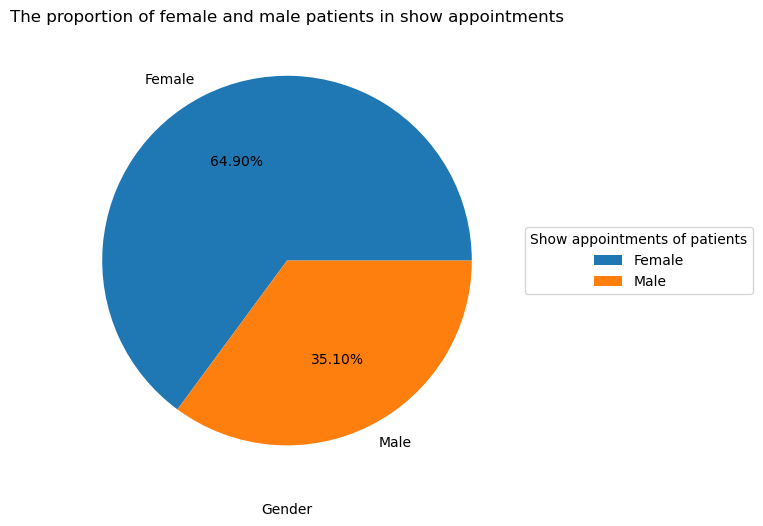

In [28]:
# Exploratory the proportion of patients in show appointments according to gender.
mylabels = ["Female", "Male"]
df[show].groupby('gender').size().plot(kind='pie',labels = mylabels,figsize=(6.5,6),autopct='%1.2f%%');
plt.title('The proportion of female and male patients in show appointments');
plt.legend(title="Show appointments of patients", loc="center left",bbox_to_anchor=(1, 0, 0.5, 1));
plt.xlabel('Gender');
plt.ylabel('');

- The percentage of female patients is 64.9 %, representing 57,245 out of 88,207 appointments (total show appointments).
- The percentage of male patients is 35.1%, representing 30,962 out of 88,207 appointments (total show appointments).

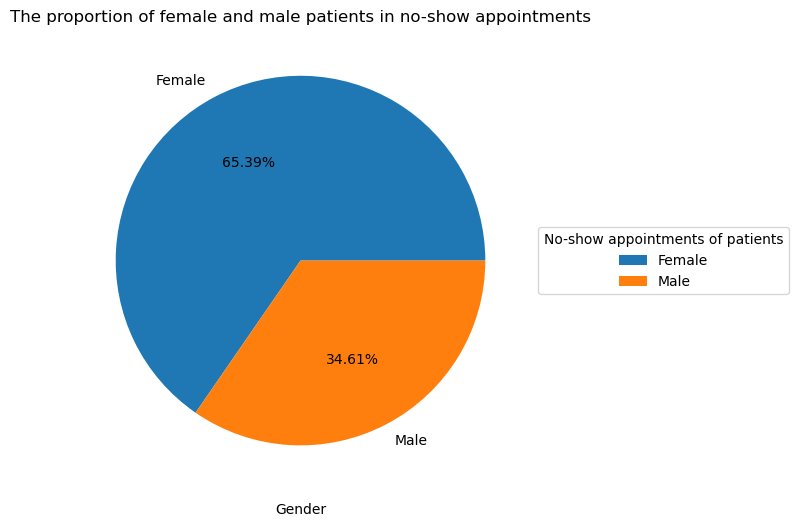

In [29]:
# Exploratory the proportion of patients in no-show appointments according to gender.
mylabels = ["Female", "Male"]
df[noshow].groupby('gender').size().plot(kind='pie',labels = mylabels,figsize=(6.5,6),autopct='%1.2f%%');
plt.title('The proportion of female and male patients in no-show appointments');
plt.legend(title="No-show appointments of patients", loc="center left",bbox_to_anchor=(1, 0, 0.5, 1));
plt.xlabel('Gender');
plt.ylabel('');

- The percentage of female patients is 65.39 %, representing 14,594 out of 22,319 appointments (total no-show appointments).
- The percentage of male patients is 34.61%, representing 7,725 out of 22,319 appointments (total no-show appointments).

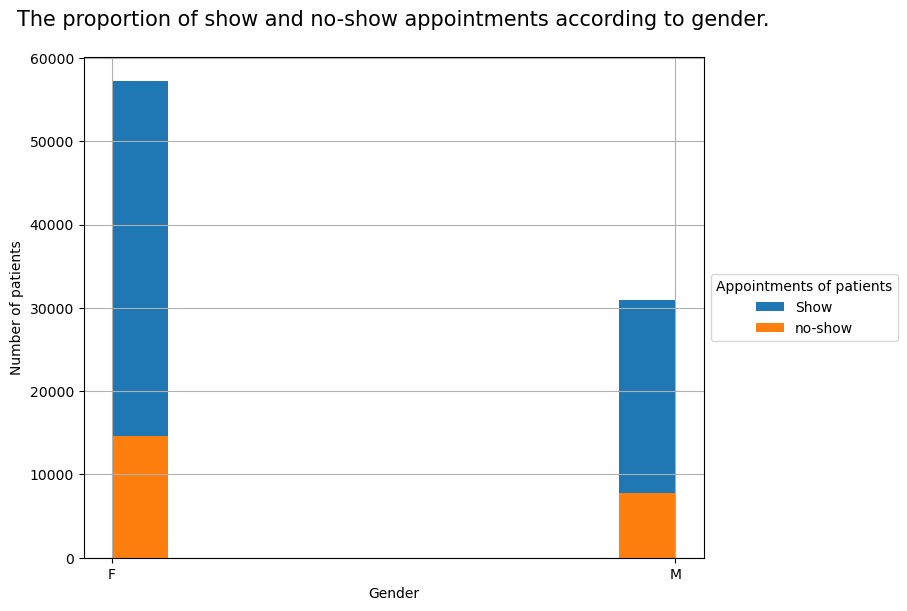

In [30]:
# Exploratory the proportion of patients in the dataset according to gender.
def showing(df,col_name):
    plt.figure(figsize =(8,6.5))
    df[col_name][show].hist(label="Show")
    df[col_name][noshow].hist(label="no-show")
    plt.legend(title="Appointments of patients",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1));
    plt.title('The proportion of show and no-show appointments according to gender.\n',fontsize =(15));
    plt.xlabel('Gender')
    plt.ylabel('Number of patients')      
showing(df,'gender')

- The percentage of female patients is 65 %, representing 71,839 out of 110,526 appointments (total dataset size).
- The percentage of show female patients is 64.9 %, representing 57,245 out of 88,207 appointments (total show appointments).
- The percentage of no-show female patients is 65.39 %, representing 14,594 out of 22,319 appointments (total no-show appointments).
- The percentage of male patients is 35%, representing 38,687 out of 110,526 appointments (total dataset size).
- The percentage of show male patients is 35.1%, representing 30,962 out of 88,207 appointments (total show appointments).
- The percentage of no-show male patients is 34.61%, representing 7,725 out of 22,319 appointments (total no-show appointments).
- No significant impact of the age variable on the no-show variable.

### Question 3: Is the scholarship variable important for us to know to predict if a patient will show up for their  scheduled appointment?

In [31]:
# Exploratory the proportion of patients in the dataset according to scholarship.
# Exploratory the proportion of show and no-show appointments according to scholarship.
print(df.shape[0])
print(df.scholarship.value_counts())
print(df[show].shape[0])
print(df[show].scholarship.value_counts())
print(df[noshow].shape[0])
print(df[noshow].scholarship.value_counts())

110526
0    99665
1    10861
Name: scholarship, dtype: int64
88207
0    79924
1     8283
Name: scholarship, dtype: int64
22319
0    19741
1     2578
Name: scholarship, dtype: int64


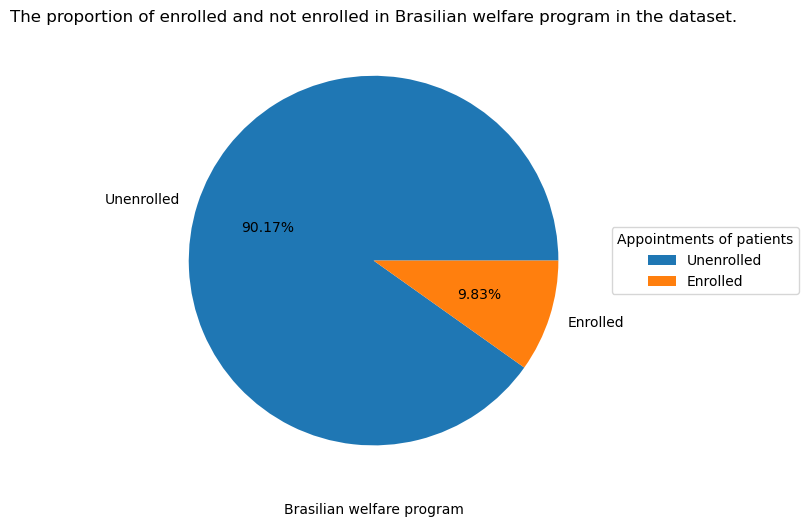

In [32]:
# Exploratory the proportion of patients in the dataset according to enrolling in Brazilian welfare program.
mylabels = ["Unenrolled", "Enrolled"]
df.groupby('scholarship').size().plot(kind='pie',labels = mylabels,figsize=(6.5,6),autopct='%1.2f%%');
plt.title('The proportion of enrolled and not enrolled in Brasilian welfare program in the dataset.');
plt.legend(title="Appointments of patients", loc="center left",bbox_to_anchor=(1, 0, 0.5, 1));
plt.xlabel('Brasilian welfare program');
plt.ylabel('');

- The percentage of enrolled patients in the Brasilian welfare program is 9.83%, representing 10,861 out of 110,526 appointments (total dataset size).
- The percentage of unenrolled patients in the Brasilian welfare program is 90.17%, representing 99,665  out of 110,526 appointments (total dataset size).

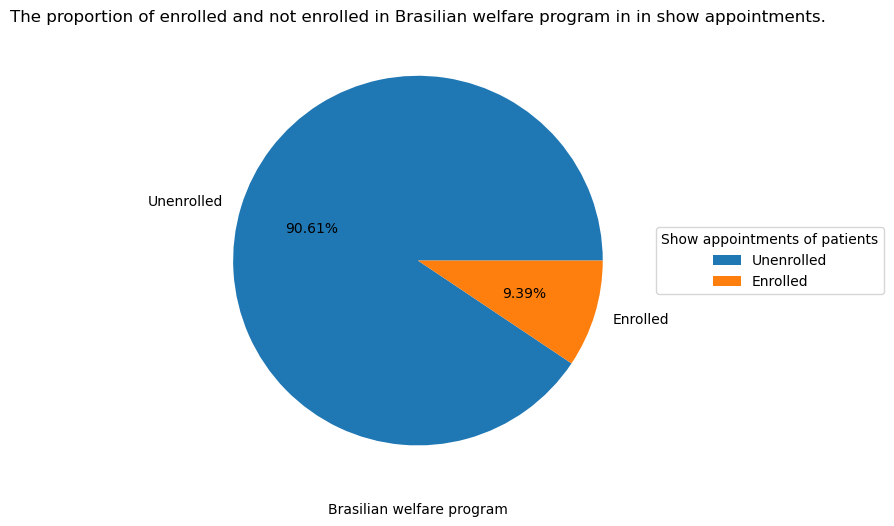

In [33]:
# Exploratory the proportion of enrolled and not enrolled in Brasilian welfare program in in show appointments.
mylabels = ["Unenrolled", "Enrolled"]
df[show].groupby('scholarship').size().plot(kind='pie',labels = mylabels,figsize=(6.5,6),autopct='%1.2f%%');
plt.title('The proportion of enrolled and not enrolled in Brasilian welfare program in in show appointments.');
plt.legend(title="Show appointments of patients", loc="center left",bbox_to_anchor=(1, 0, 0.5, 1));
plt.xlabel('Brasilian welfare program');
plt.ylabel('');

- The percentage of enrolled patients in the Brazilian welfare program is 9.39%, representing 8,283 out of 88,207 appointments (total show appointments).
- The percentage of unenrolled patients in the Brazilian welfare program is 90.61%, representing 79,924 out of 88,207 appointments (total show appointments).

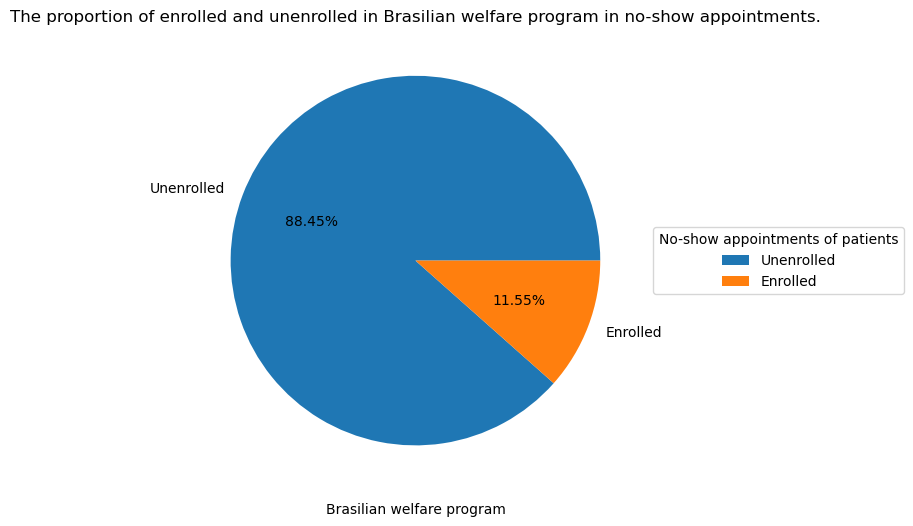

In [34]:
# Exploratory the proportion of enrolled and not enrolled in Brasilian welfare program in no-show appointments.
mylabels = ["Unenrolled", "Enrolled"]
df[noshow].groupby('scholarship').size().plot(kind='pie',labels = mylabels,figsize=(6.5,6),autopct='%1.2f%%');
plt.title('The proportion of enrolled and unenrolled in Brasilian welfare program in no-show appointments.');
plt.legend(title="No-show appointments of patients", loc="center left",bbox_to_anchor=(1, 0, 0.5, 1));
plt.xlabel('Brasilian welfare program');
plt.ylabel('');

- The percentage of enrolled patients in the Brasilian welfare program is 11.55%, representing 2,578 out of 22,319 appointments (total no-show appointments).
- The percentage of unenrolled patients in the Brasilian welfare program is 88.45%, representing 19,741 out of 22,319  appointments (total no-show appointments).

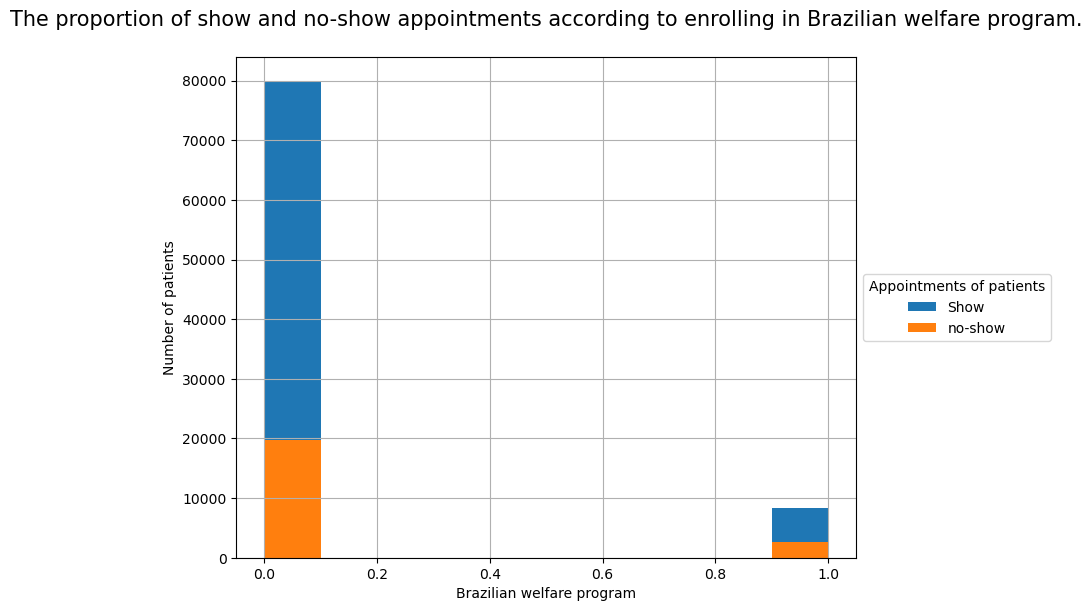

In [35]:
# Exploratory the proportion of patients in the dataset according to enrolling in Brazilian welfare program.
def showing(df,col_name):
    plt.figure(figsize =(8,6.5))
    df[col_name][show].hist(label="Show")
    df[col_name][noshow].hist(label="no-show")
    plt.legend(title="Appointments of patients",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1));
    plt.title('The proportion of show and no-show appointments according to enrolling in Brazilian welfare program.\n',fontsize =(15));
    plt.xlabel('Brazilian welfare program')
    plt.ylabel('Number of patients');
showing(df,'scholarship')

- The percentage of enrolled patients in the Brasilian welfare program is 9.83%, representing 10,861 out of 110,526 appointments (total dataset size).
- The percentage of show enrolled patients in the Brazilian welfare program is 9.39%, representing 8,283 out of 88,207 appointments (total show appointments).
- The percentage of no-show enrolled patients in the Brazilian welfare program is 11.55%, representing 2,578 out of 22,319 appointments (total no-show appointments).
- The percentage of unenrolled patients in the Brasilian welfare program is 90.17%, representing 99,665  out of 110,526 appointments (total dataset size).
- The percentage of show unenrolled patients in the Brazilian welfare program is 90.61%, representing 79,924 out of 88,207 appointments (total show appointments).
- The percentage of no-show unenrolled patients in the Brazilian welfare program is 88.45%, representing 19,741 out of 22,319  appointments (total no-show appointments).
- No significant impact of the scholarship (enrolling in Brazilian welfare program) variable on the no-show variable.

### Question 4: Is the hypertension variable important for us to know to predict if a patient will show up for their  scheduled appointment?

In [36]:
# Exploratory the proportion of patients in the dataset according to hypertension.
# Exploratory the proportion of show and no-show appointments according to hypertension.
print(df.shape[0])
print(df.hypertension.value_counts())
print(df[show].shape[0])
print(df[show].hypertension.value_counts())
print(df[noshow].shape[0])
print(df[noshow].hypertension.value_counts())

110526
0    88725
1    21801
Name: hypertension, dtype: int64
88207
0    70178
1    18029
Name: hypertension, dtype: int64
22319
0    18547
1     3772
Name: hypertension, dtype: int64


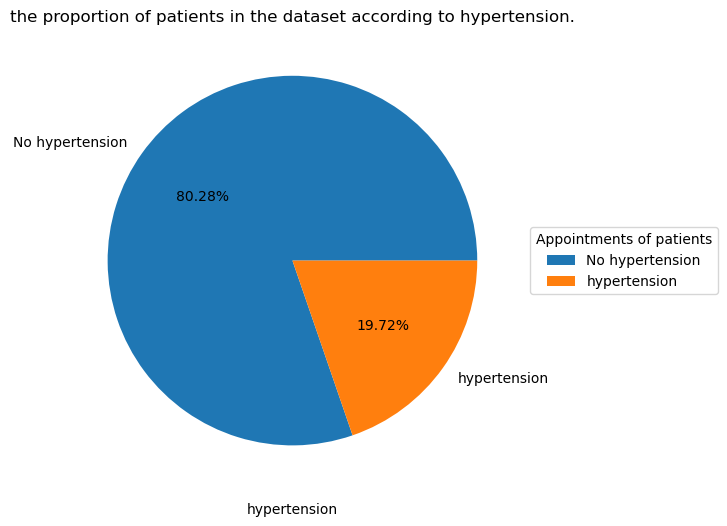

In [37]:
# Exploratory the proportion of patients in the dataset according to hypertension.
mylabels = ["No hypertension", "hypertension"]
df.groupby('hypertension').size().plot(kind='pie',labels = mylabels,figsize=(6.5,6),autopct='%1.2f%%');
plt.title('the proportion of patients in the dataset according to hypertension.');
plt.legend(title="Appointments of patients", loc="center left",bbox_to_anchor=(1, 0, 0.5, 1));
plt.xlabel('hypertension');
plt.ylabel('');

- The percentage of hypertension patients is 19.72%, representing 21,801 out of 110,526 appointments (total dataset size).
- The percentage of no hypertension patients is 80.28%, representing 88,725 out of 110,526 appointments (total dataset size).

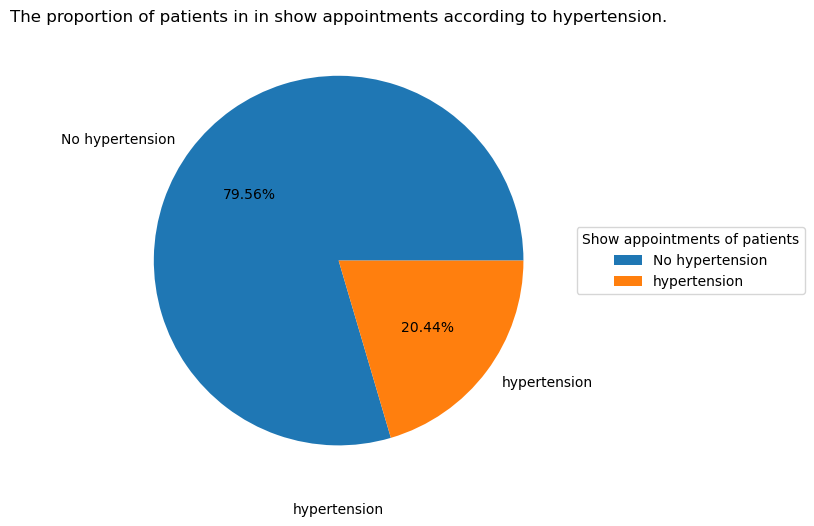

In [38]:
# Exploratory the proportion of patients in show appointments according to hypertension.
mylabels = ["No hypertension", "hypertension"]
df[show].groupby('hypertension').size().plot(kind='pie',labels = mylabels,figsize=(6.5,6),autopct='%1.2f%%');
plt.title('The proportion of patients in in show appointments according to hypertension.');
plt.legend(title="Show appointments of patients", loc="center left",bbox_to_anchor=(1, 0, 0.5, 1));
plt.xlabel('hypertension');
plt.ylabel('');

- The percentage of show hypertension patients is  20.44%, representing 18,029 out of 88,207 appointments (total show appointments).
- The percentage of show no hypertension patients is 79.56%, representing 70,178 out of 88,207 appointments (total show appointments).

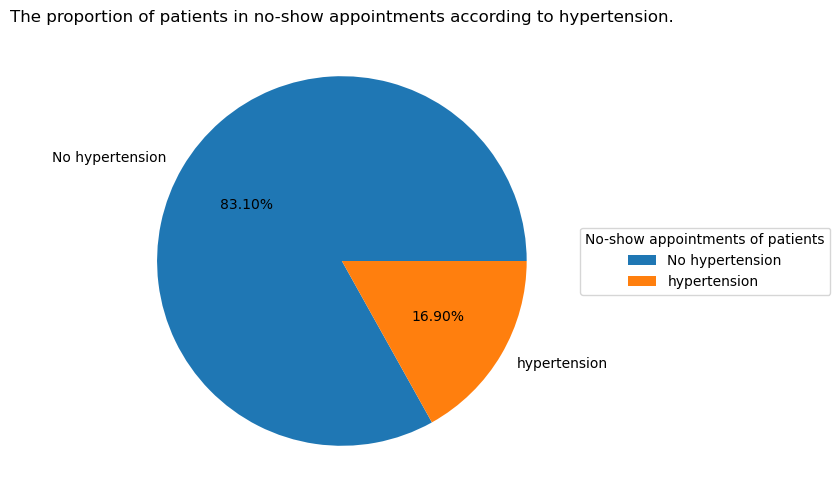

In [39]:
# Exploratory the proportion of patients in no-show appointments according to hypertension.
mylabels = ["No hypertension", "hypertension"]
df[noshow].groupby('hypertension').size().plot(kind='pie',labels = mylabels,figsize=(6.5,6),autopct='%1.2f%%');
plt.title('The proportion of patients in no-show appointments according to hypertension.');
plt.legend(title="No-show appointments of patients", loc="center left",bbox_to_anchor=(1, 0, 0.5, 1));
plt.ylabel('');

- The percentage of no-show hypertension patients is 16.9%, representing 3,772 out of 22,319 appointments (total no-show appointments).
- The percentage of no-show no hypertension patients is 83.10%, representing 18,547 out of 22,319 appointments (total no-show appointments).

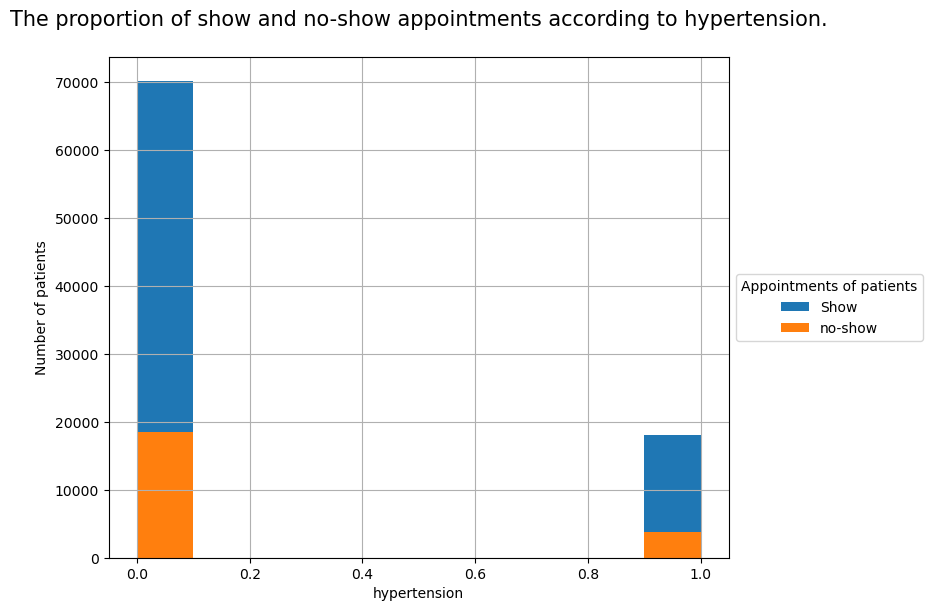

In [40]:
# Exploratory the proportion of patients in the dataset according to hypertension.
def showing(df,col_name):
    plt.figure(figsize =(8,6.5))
    df[col_name][show].hist(label="Show")
    df[col_name][noshow].hist(label="no-show")
    plt.legend(title="Appointments of patients",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1));
    plt.title('The proportion of show and no-show appointments according to hypertension.\n',fontsize =(15));
    plt.xlabel('hypertension')
    plt.ylabel('Number of patients');
showing(df,'hypertension')

- The percentage of hypertension patients is 19.72%, representing 21,801 out of 110,526 appointments (total dataset size).
- The percentage of show hypertension patients is  20.44%, representing 18,029 out of 88,207 appointments (total show appointments).
- The percentage of no-show hypertension patients is 16.9%, representing 3,772 out of 22,319 appointments (total no-show appointments).
- The percentage of no hypertension patients is 80.28%, representing 88,725 out of 110,526 appointments (total dataset size).
- The percentage of show no hypertension patients is 79.56%, representing 70,178 out of 88,207 appointments (total show appointments).
- The percentage of no-show no hypertension patients is 83.10%, representing 18,547 out of 22,319 appointments (total no-show appointments).
- No significant impact of the hypertension variable on the no-show variable.

### Question 5: Is the diabetes variable important for us to know to predict if a patient will show up for their  scheduled appointment?

In [41]:
# Exploratory the proportion of patients in the dataset according to diabetes.
# Exploratory the proportion of show and no-show appointments according to diabetes.
print(df.shape[0])
print(df.diabetes.value_counts())
print(df[show].shape[0])
print(df[show].diabetes.value_counts())
print(df[noshow].shape[0])
print(df[noshow].diabetes.value_counts())

110526
0    102583
1      7943
Name: diabetes, dtype: int64
88207
0    81694
1     6513
Name: diabetes, dtype: int64
22319
0    20889
1     1430
Name: diabetes, dtype: int64


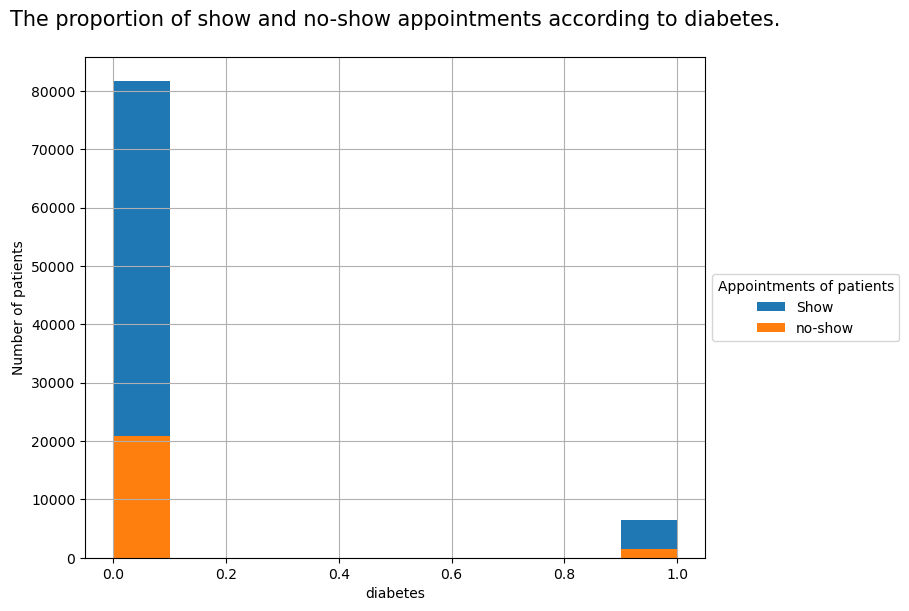

In [42]:
# Exploratory the proportion of patients in the dataset according to diabetes.
def showing(df,col_name):
    plt.figure(figsize =(8,6.5))
    df[col_name][show].hist(label="Show")
    df[col_name][noshow].hist(label="no-show")
    plt.legend(title="Appointments of patients",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1));
    plt.title('The proportion of show and no-show appointments according to diabetes.\n',fontsize =(15));
    plt.xlabel('diabetes')
    plt.ylabel('Number of patients');
showing(df,'diabetes')

- No significant impact of the diabetes variable on the no-show variable.

### Question 6: Is the alcoholism variable important for us to know to predict if a patient will show up for their  scheduled appointment?

In [43]:
# Exploratory the proportion of patients in the dataset according to alcoholism.
# Exploratory the proportion of show and no-show appointments according to alcoholism.
print(df.shape[0])
print(df.alcoholism.value_counts())
print(df[show].shape[0])
print(df[show].alcoholism.value_counts())
print(df[noshow].shape[0])
print(df[noshow].alcoholism.value_counts())

110526
0    107166
1      3360
Name: alcoholism, dtype: int64
88207
0    85524
1     2683
Name: alcoholism, dtype: int64
22319
0    21642
1      677
Name: alcoholism, dtype: int64


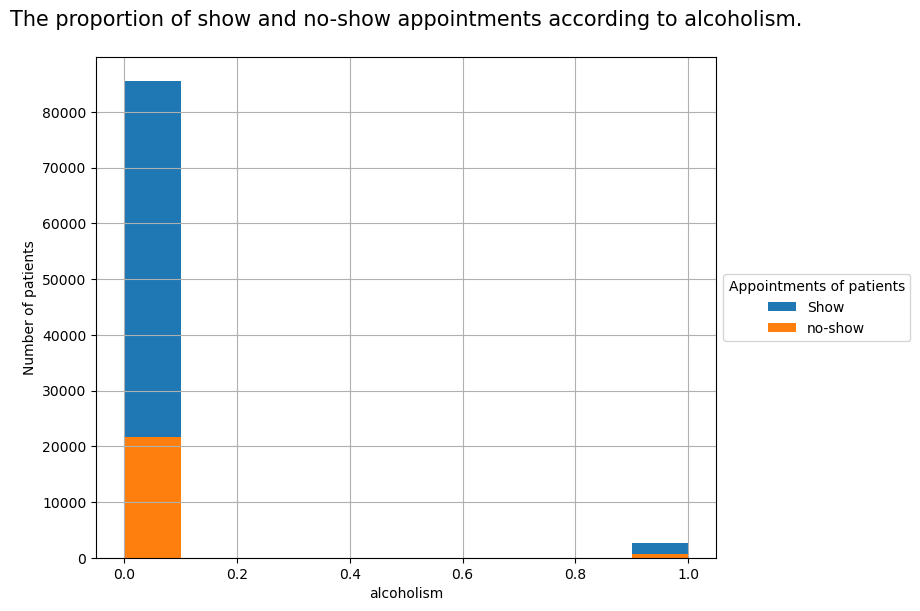

In [44]:
# Exploratory the proportion of patients in the dataset according to alcoholism.
def showing(df,col_name):
    plt.figure(figsize =(8,6.5))
    df[col_name][show].hist(label="Show")
    df[col_name][noshow].hist(label="no-show")
    plt.legend(title="Appointments of patients",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1));
    plt.title('The proportion of show and no-show appointments according to alcoholism.\n',fontsize =(15));
    plt.xlabel('alcoholism')
    plt.ylabel('Number of patients');
showing(df,'alcoholism') 

 No significant impact of the alcoholism variable on the no-show variable.

### Question 7: Is the handicap variable important for us to know to predict if a patient will show up for their  scheduled appointment?

In [45]:
# Exploratory the proportion of patients in the dataset according to handicap.         
# Exploratory the proportion of show and no-show appointments according to handicap.        
print(df.shape[0])
print(df.handicap.value_counts())
print(df[show].shape[0])
print(df[show].handicap.value_counts())
print(df[noshow].shape[0])
print(df[noshow].handicap.value_counts())

110526
0    108285
1      2042
2       183
3        13
4         3
Name: handicap, dtype: int64
88207
0    86373
1     1676
2      146
3       10
4        2
Name: handicap, dtype: int64
22319
0    21912
1      366
2       37
3        3
4        1
Name: handicap, dtype: int64


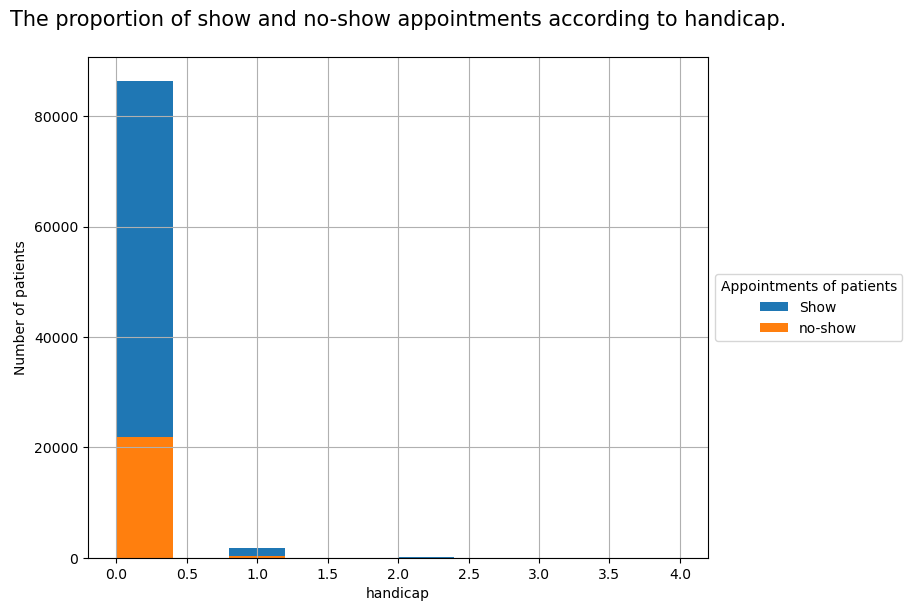

In [46]:
# Exploratory the proportion of patients in the dataset according to handicap.
def showing(df,col_name):
    plt.figure(figsize =(8,6.5))
    df[col_name][show].hist(label="Show")
    df[col_name][noshow].hist(label="no-show")
    plt.legend(title="Appointments of patients",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1));
    plt.title('The proportion of show and no-show appointments according to handicap.\n',fontsize =(15));
    plt.xlabel('handicap')
    plt.ylabel('Number of patients')    
showing(df,'handicap')

No significant impact of the handicap variable on the no-show variable.

### Question 8: Is the sms_received variable important for us to know to predict if a patient will show up for their  scheduled appointment?

In [47]:
# Exploratory the proportion of patients in the dataset according to sms_received.
# Exploratory the proportion of show and no-show appointments according to sms_received.
print(df.shape[0])
print(df.sms_received.value_counts())
print(df[show].shape[0])
print(df[show].sms_received.value_counts())
print(df[noshow].shape[0])
print(df[noshow].sms_received.value_counts())

110526
0    75044
1    35482
Name: sms_received, dtype: int64
88207
0    62509
1    25698
Name: sms_received, dtype: int64
22319
0    12535
1     9784
Name: sms_received, dtype: int64


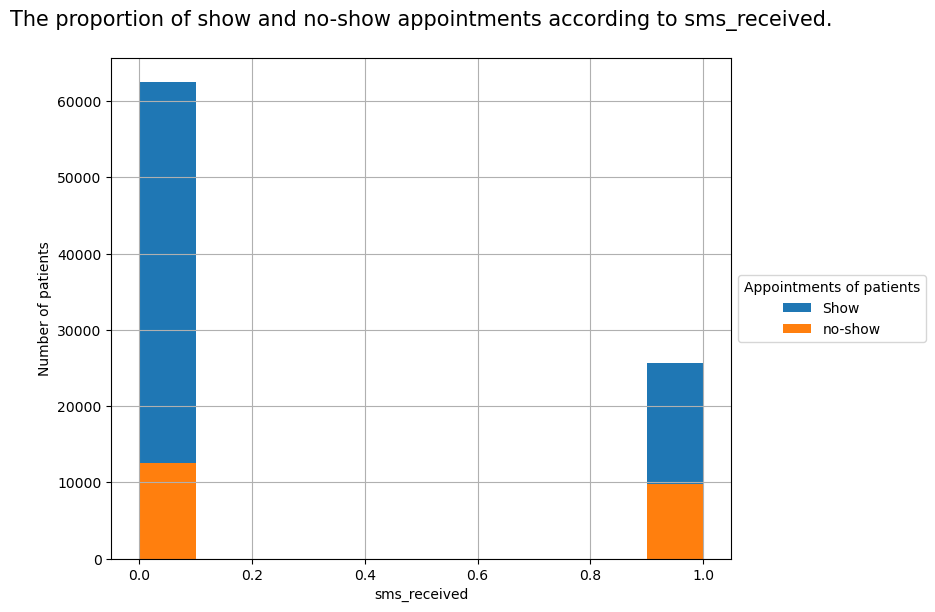

In [48]:
# Exploratory the proportion of patients in the dataset according to sms_received.
def showing(df,col_name):
    plt.figure(figsize =(8,6.5))
    df[col_name][show].hist(label="Show")
    df[col_name][noshow].hist(label="no-show")
    plt.legend(title="Appointments of patients",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1));
    plt.title('The proportion of show and no-show appointments according to sms_received.\n',fontsize =(15));
    plt.xlabel('sms_received')
    plt.ylabel('Number of patients');   
showing(df,'sms_received')

- No significant impact of the sms_received variable on the no-show variable.
- On the contrary, most patients are shown without receiving SMS.
- The percentage of show patients who received SMS is 29.14%, representing 25,698 out of 88,207 appointments (total show appointments).
- The percentage of show patients who didn't receive SMS is 70.86%, representing 62,509 out of 88,207 appointments (total show appointments).
- The percentage of no-show patients who received SMS is 43.84%, representing 9,784 out of 22,319 appointments (total no-show appointments).
- The percentage of no-show patients who didn't receive SMS is 56.16%, representing 12,535 out of 22,319 appointments (total no-show appointments).

### Question 9: Is the neighbourhood variable important for us to know to predict if a patient will show up for their  scheduled appointment?

In [49]:
# Exploratory the proportion of patients in the dataset according to neighbourhood.
# Exploratory the proportion of show and no-show appointments according to neighbourhood.
print(df.shape[0])
print(df.neighbourhood.value_counts().head())
print(df[show].shape[0])
print(df[show].neighbourhood.value_counts().head())
print(df[noshow].shape[0])
print(df[noshow].neighbourhood.value_counts().head())

110526
JARDIM CAMBURI     7717
MARIA ORTIZ        5805
RESISTÊNCIA        4431
JARDIM DA PENHA    3877
ITARARÉ            3514
Name: neighbourhood, dtype: int64
88207
JARDIM CAMBURI     6252
MARIA ORTIZ        4586
RESISTÊNCIA        3525
JARDIM DA PENHA    3246
SANTA MARTHA       2635
Name: neighbourhood, dtype: int64
22319
JARDIM CAMBURI    1465
MARIA ORTIZ       1219
ITARARÉ            923
RESISTÊNCIA        906
CENTRO             703
Name: neighbourhood, dtype: int64


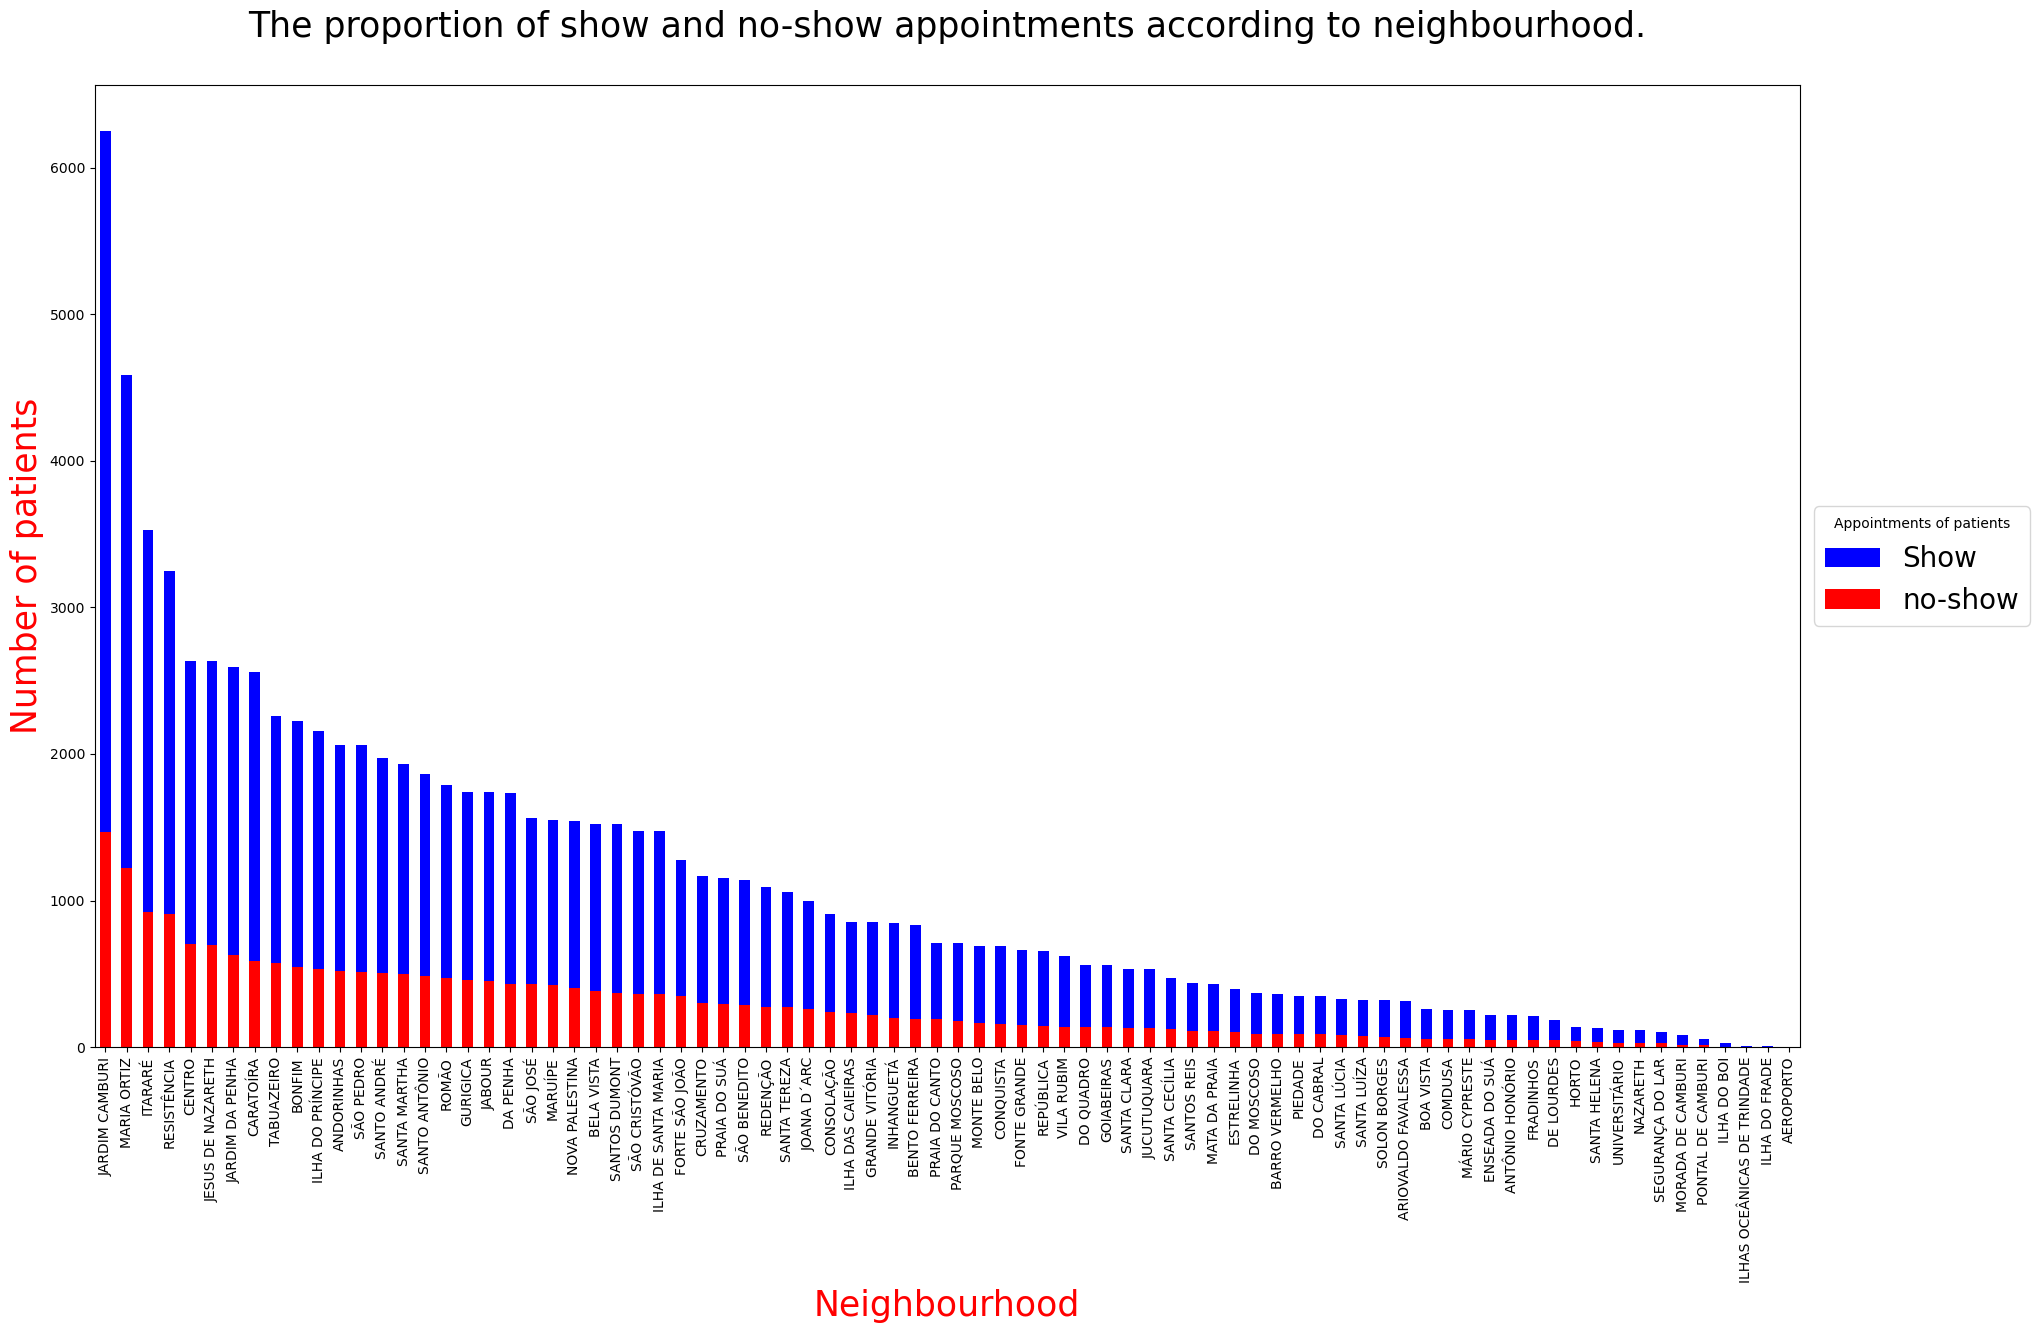

In [50]:
# Exploratory the proportion of patients in the dataset according to neighbourhood.
plt.figure(figsize =(22,12.5))
df[show].neighbourhood.value_counts().plot(kind='bar',color='blue',label="Show");
df[noshow].neighbourhood.value_counts().plot(kind='bar',color='red',label="no-show");
plt.legend(title="Appointments of patients",loc="center left",fontsize=20,bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('The proportion of show and no-show appointments according to neighbourhood.\n',fontsize =25)
plt.xlabel('Neighbourhood',fontsize=25,color='red')
plt.ylabel('Number of patients',fontsize=25,color='red');

There is a significant impact of the neighbourhood variable on the no-show variable.

<a id='conclusions'></a>
## Conclusions



- Patients aged 0-11 years and 47-58 years are shown more than other age groups.
- There is a significant impact of the age variable on the no-show variable.
- There is a significant impact of the neighborhood variable on the no-show variable.
-  Strangely, most patients are shown without receiving an SMS, the percentage of show patients who received SMS is 29.14%, and who didn't receive SMS is 70.86%.

### Limitations 
No clear correlation between the (gender, scholarship, hypertension, diabetes, alcoholism, handicap, or sms_received) variable and the no-show variable.       